In [3]:
import urllib2
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LassoCV
from math import sqrt
import matplotlib.pyplot as plt

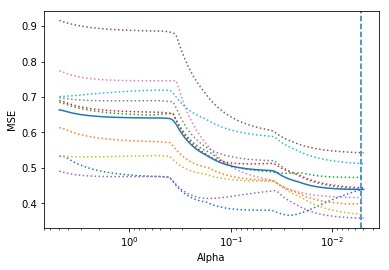

('alpha value that minimizes CV error ', 0.0052692947038249123)
('Minimum MSE ', 0.4393606730929136)


In [50]:
target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = urllib2.urlopen(target_url)

xList = []
labels = []
names = []
firstline = True
for line in data:
    if firstline:
        names = line.strip().split(";")
        firstline = False
    else:
        row = line.strip().split(";")
        labels.append(float(row[-1]))
        row.pop()
        floatRow = [float(num) for num in row]
        xList.append(floatRow)
        
# Normalize columns in x and labels

nrows = len(xList)
ncols = len(xList[0])

# Calculate means and variance
xMeans = []
xSD = []
for i in range(ncols):
    col = [xList[j][i] for j in range(nrows)]
    mean = sum(col)/nrows
    xMeans.append(mean)
    colDiff = [(xList[j][i] - mean) for j in range(nrows)]
    sumSq = sum([colDiff[i] * colDiff[i] for i in range(nrows)])
    stdDev = sqrt(sumSq/nrows)
    xSD.append(stdDev)
    
# Use mean and SD to normalize xList
xNormalized = []
for i in range(nrows):
    rowNormalized = [(xList[i][j] - xMeans[j])/xSD[j] for j in range(ncols)]
    xNormalized.append(rowNormalized)
    
# Normalize labels
meanLabel = sum(labels)/nrows
sdLabel = sqrt(sum([(labels[i] - meanLabel) * (labels[i] - meanLabel) for i in range(nrows)])/nrows)
labelNormalized = [(labels[i] - meanLabel)/sdLabel for i in range(nrows)]

#Convert into Numpy for input to sklearn packages

# Unormalzied Labels
Y = np.array(labels)

# Unnormalized X's
X = np.array(xList)

# Normalized labels
#Y = np.array(labelNormalized)

# Normalized X's
#X = np.array(xNormalized)

# Call LassoCV from sklearn packages

wineModel = LassoCV(cv=10).fit(X,Y)

# Display results

plt.figure()
plt.plot(wineModel.alphas_, wineModel.mse_path_, ":")
plt.plot(wineModel.alphas_, wineModel.mse_path_.mean(axis=-1), label="Average MSE across Folds")
plt.axvline(wineModel.alpha_, linestyle='--', label='CV Estimate of Best alpha')
plt.semilogx()
ax = plt.gca()
ax.invert_xaxis()
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.axis("tight")
plt.show()

# Print out the value of alpha that minimizes the CV error
print ("alpha value that minimizes CV error ", wineModel.alpha_)
print ("Minimum MSE ", min(wineModel.mse_path_.mean(axis=-1)))

